M. Rifal Alfathur Fauzan
rifalalfathur@gmail.com
Kab. Bandung

# Data Loading

inisialisai library apa saja yang akan digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

penggunaan dataset ini bertujuan untuk mengetahui karakteristik apa saja yang mempengaruhi harga mobil di Polandia. data set dapat didapat di https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland

In [2]:
data = pd.read_csv('/content/Car_Prices_Poland_Kaggle.csv')
data

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


terdapat 117927 baris dan 11 kolom pada dataset ini. Dan dapat dilihat terdapat variabel yang dapat dihapus yaitu "Unnamed: 0" dan ini tidak berpengaruh terhadap analysis. Untuk menghapus variabel tsb dapat menggunakan syntax berikut:

In [3]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)
data.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


* mark = car mark
* model = car model
* generation_name = Formatted Generation
* year = Car Year
* mileage = Car Mileage in Kilometers
* vol_engine = Auto Engine Size
* fuel = Engine Type
* city = locality in Poland
* province = Region of Poland
* price = Price in PLN (approx. 1USD=1PLN)

# **Exploratory Data Analysis - Deskripsi Variabel**

kemudian cek informasi yang terdapat pada dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.0+ MB


*   terdapat empat kolom int64: year, mileage, vol_engine, dan price
*   terdapat enam kolom object: mark, model, generation_name, fuel, city, dan province

kemudian cek deskripsi statistik dataset

In [5]:
data.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,5.690135,9.236936e+04,643.613438,8.482458e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom. 
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas 
*   interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.

# **Menangani Missing Value**

terdapat missing value di vol_engine karena volume engine tidak mungkin 0 tidak akan 0 sehingga dapat dihilangkan, dan sama untuk mileage karena bahkan untuk setiap mobil baru pun tidak akan 0.

In [6]:
mileage	= (data.mileage	 == 0).sum() 	
vol_engine	 = (data.vol_engine	 == 0).sum()
print("Nilai 0 di kolom mileage ada: ", mileage)
print("Nilai 0 di kolom vol_engine ada: ", vol_engine)


Nilai 0 di kolom mileage ada:  373
Nilai 0 di kolom vol_engine ada:  1248


karena nilai 0 di kolom vol_engine yang paling banyak, maka disini dicek apakah nilai 0 tsb terdapat di kolom yang lain atau tidak. Dengan menggunakan syntax berikut:

In [7]:
data.loc[(data['vol_engine']==0)]

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
370,opel,ampera,NaN,2019,23304,0,Electric,Gdańsk,Pomorskie,149900
3202,opel,astra,gen-k-2015,2021,0,0,Diesel,Katowice,Śląskie,91600
3248,opel,astra,gen-k-2015,2021,0,0,Diesel,Katowice,Śląskie,100000
5393,opel,corsa,gen-f-2019,2020,5000,0,Electric,Chorzów,Śląskie,119900
5414,opel,corsa,gen-f-2019,2021,5,0,Electric,Łódź,Łódzkie,105900
...,...,...,...,...,...,...,...,...,...,...
115956,volvo,xc-40,NaN,2021,5,0,Electric,Gdynia,Pomorskie,252900
115967,volvo,xc-40,NaN,2022,1,0,Electric,Katowice,Śląskie,220600
115990,volvo,xc-40,NaN,2021,4300,0,Electric,Tychy,Śląskie,284900
115995,volvo,xc-40,NaN,2021,1,0,Electric,Chorzów,Śląskie,210100


dapat dilihat ada beberapa nilai 0 pada vol_engine yang berdampingan dengan mileage. Selanjutnya kita tangani masalah missing value ini dengan menggantinya dengan median karena jika dihapus itu tidak mungkin karena data yang harus dihapus cukup banyak dan itu dapat mempengaruhi dataset. Maka gunakan syntax berikut untuk menangani nya

In [8]:
# Drop baris dengan nilai 'vol_engine' = 0
#data = data.loc[(data[['vol_engine']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop

median = data['vol_engine'].median()
data['vol_engine'] = data['vol_engine'].replace(0, median)
data.shape

(117927, 10)

In [9]:
median = data['mileage'].median()
data['mileage'] = data['mileage'].replace(0, median)
data.shape

(117927, 10)

In [10]:
data.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.414394e+05,1831.064523,7.029988e+04
std,5.690135,9.202777e+04,615.735482,8.482458e+04
min,1945.000000,1.000000e+00,1.000000,5.000000e+02
25%,2009.000000,6.824000e+04,1496.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


missing value sudah teratasi dengan menggantinya dengan median

# **Menangani Outliers**

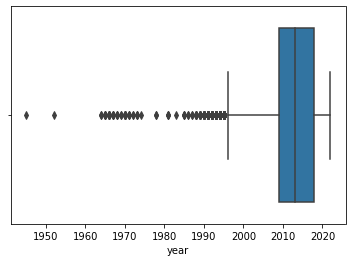

In [11]:
sns.boxplot(x=data['year'])	

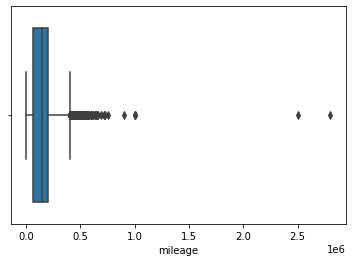

In [12]:
sns.boxplot(x=data['mileage'])

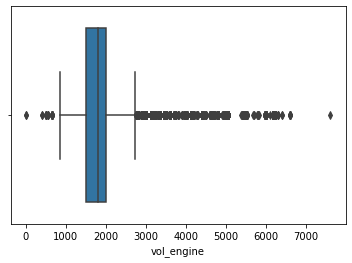

In [13]:
sns.boxplot(x=data['vol_engine'])

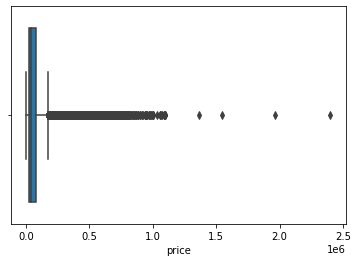

In [14]:
sns.boxplot(x=data['price'])	

persamaaan untuk mencari batas bawah dan atas adalah sebagai berikut:
* Batas bawah = Q1 - 1.5 * IQR
* Batas atas = Q3 + 1.5 * IQR

data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1

dapat dilihat dari gambar gambar fitur di atas terdapat banyak outlier, dan untuk menangani hal tersebut maka outlier tersebut dihilangkan dengan menggunakan syntax berikut:

In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(100858, 10)

In [16]:
data.describe()

,year,mileage,vol_engine,price
count,100858.000000,100858.000000,100858.000000,100858.000000
mean,2012.578199,146457.351187,1671.068512,49096.830772
std,5.292642,84147.600678,340.661859,38743.401535
min,1996.000000,1.000000,875.000000,500.000000
25%,2009.000000,83000.000000,1398.000000,19700.000000
50%,2013.000000,152173.500000,1598.000000,36900.000000
75%,2017.000000,203223.250000,1984.000000,67900.000000
max,2022.000000,405000.000000,2720.000000,177500.000000


sudah tidak terdapat missing value sehingga data sudah layak proses

# **Univariate Analysis**

Analysis dengan teknik univariate EDA. pertama tama :membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [17]:
numerical_features = ['year',	'mileage',	'vol_engine','price']
categorical_features = ['mark',	'model',	'generation_name',	'fuel',	'city',	'province']


## Categorical Features

### Fitur mark

               jumlah sampel  persentase
opel                   11747        11.6
volkswagen              9913         9.8
ford                    8998         8.9
audi                    7569         7.5
renault                 6907         6.8
bmw                     6300         6.2
skoda                   5665         5.6
toyota                  4921         4.9
peugeot                 4901         4.9
hyundai                 4015         4.0
kia                     3672         3.6
mercedes-benz           3527         3.5
volvo                   3198         3.2
nissan                  3011         3.0
fiat                    2857         2.8
seat                    2841         2.8
mazda                   2808         2.8
citroen                 2685         2.7
honda                   2123         2.1
mitsubishi              1057         1.0
mini                    1050         1.0
alfa-romeo               576         0.6
chevrolet                517         0.5


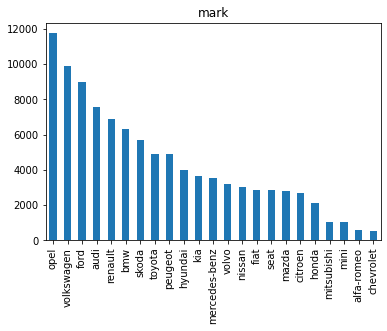

In [18]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

dapat dilihat bahwa mobil yang paling banyak adalah dari pabrikan opel dan yang paling sedikit dari pabrikan chevrolet

### Fitur model

            jumlah sampel  persentase
astra                3329         3.3
a4                   2561         2.5
golf                 2517         2.5
seria-3              2294         2.3
focus                2122         2.1
...                   ...         ...
california              2         0.0
seria-7                 1         0.0
enyaq                   1         0.0
f150                    1         0.0
id4                     1         0.0

[294 rows x 2 columns]


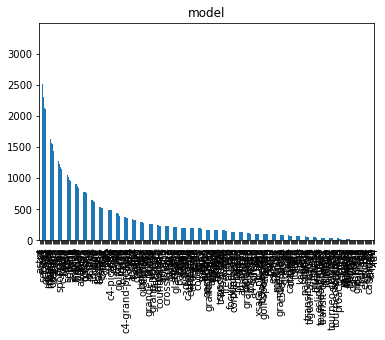

In [19]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

pada fiitur model ini model yang paling banyak adalah modelastra dan ynag paling sedikit adalah id4

### Fitur generation_name

                    jumlah sampel  persentase
gen-8p-2003-2012             1538         2.0
gen-j-2009-2015              1376         1.8
gen-a-2008-2017              1190         1.6
gen-iii-2013                 1182         1.6
gen-mk3-2010                 1117         1.5
...                           ...         ...
gen-c257-2018                   1         0.0
gen-e38-1994-2001               1         0.0
gen-w222-2013                   1         0.0
gen-w164-2005-2011              1         0.0
gen-w124-1993-1997              1         0.0

[329 rows x 2 columns]


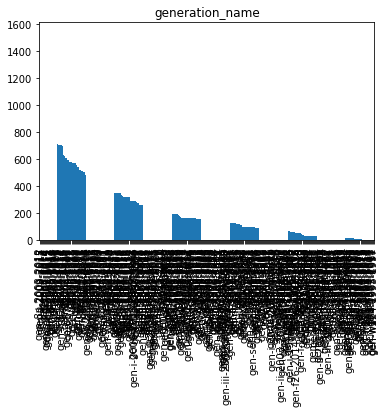

In [20]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

pada fitur generation_name yang paling banyak adalah gen-8p-2003-2012

### Fitur fuel

          jumlah sampel  persentase
Gasoline          54873        54.4
Diesel            40082        39.7
LPG                3777         3.7
Hybrid             1582         1.6
Electric            497         0.5
CNG                  47         0.0


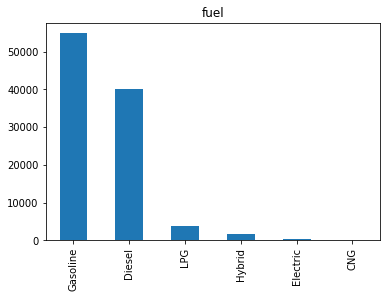

In [21]:
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

berdasarkan fitue fuel kebanyakan kendaraan menggunnakan gasoline, diesel, LPG, hybrid, electric, dan yang paling sedikit adalah CNG

## Numerical Features

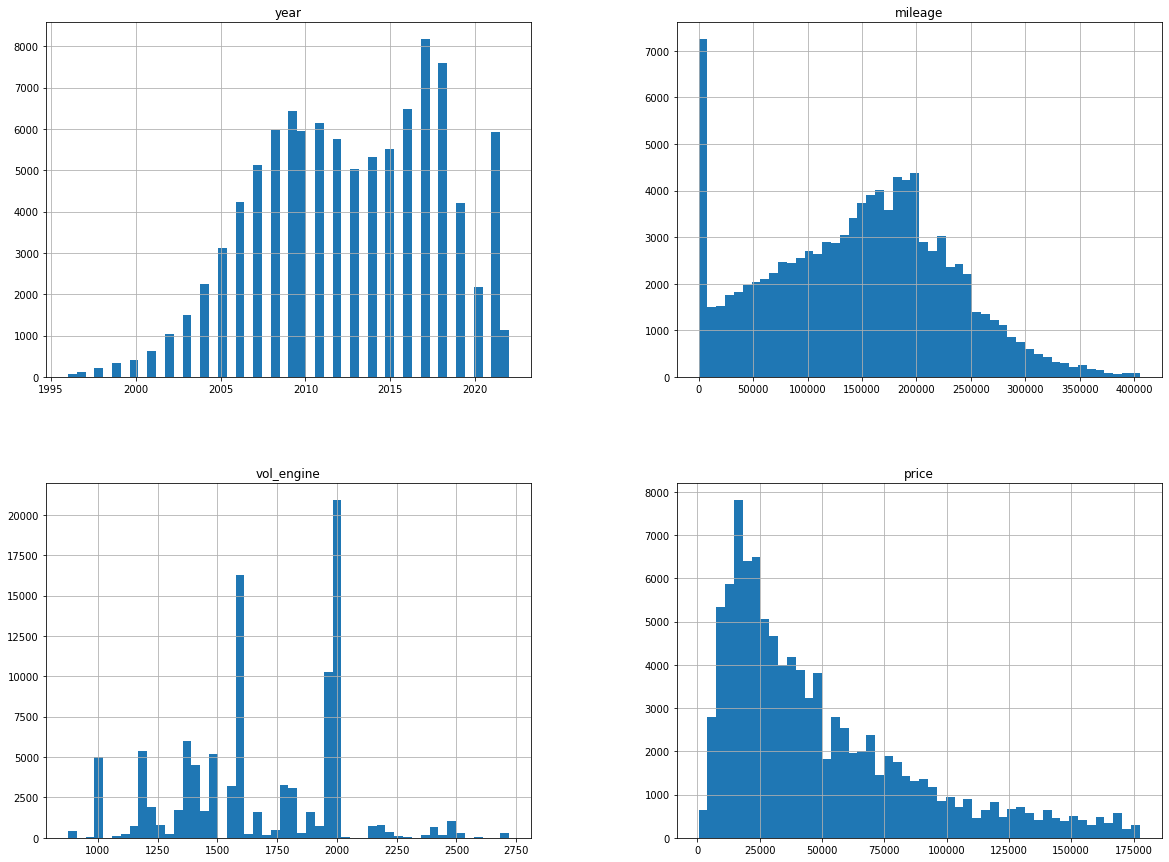

In [22]:
data.hist(bins=50, figsize=(20,15))
plt.show()

disini kita fokuskan analisis kita hanya pada histogram "price"

* Peningkatan harga mobil sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
* Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $175000.

# **Exploratory Data Analysis - Multivariate Analysis**

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data.

## Categorical Features

Pada tahap ini, kita akan mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga

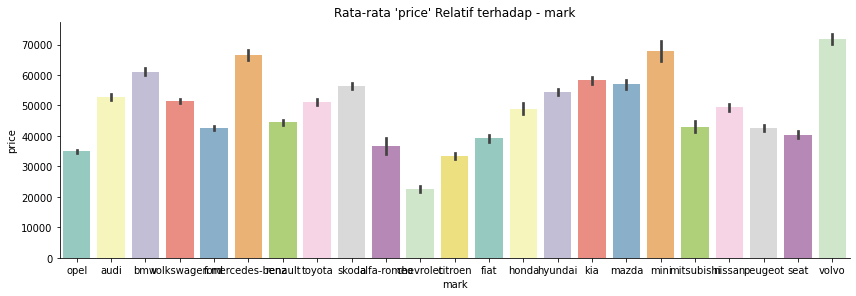

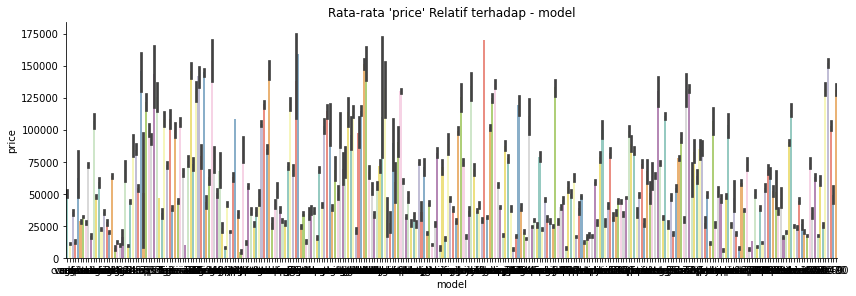

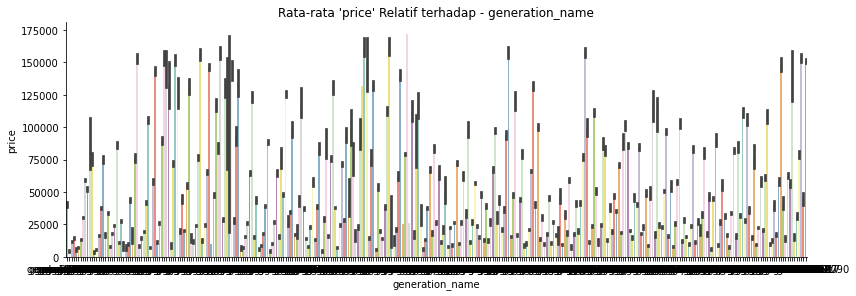

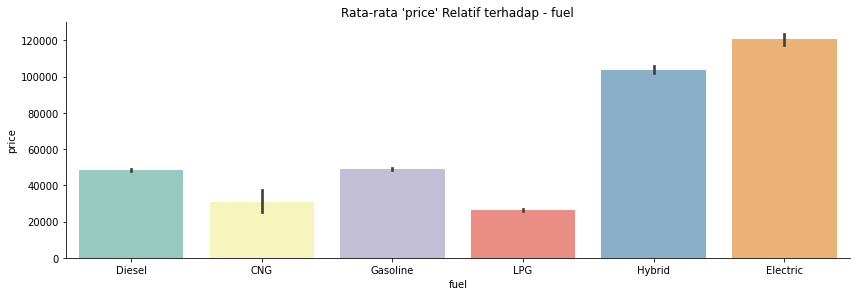

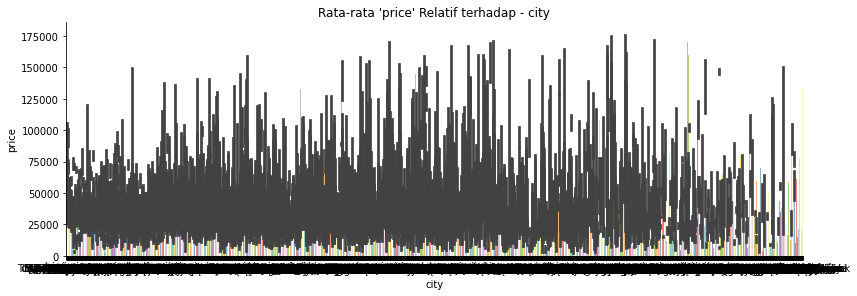

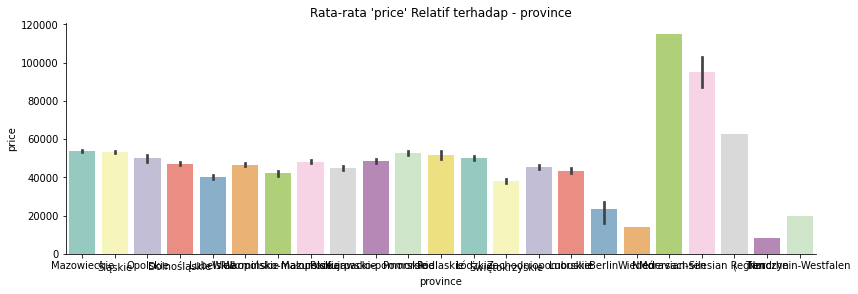

In [23]:
cat_features = data.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

* pada fitur mark jenis volvo memiliki harga tertinggi dan yang paling rendah adalah chevrolet
* pada fitur fuel jenis electric memiliki harga paling tinggi diikuti oleh hybrid, dan yang paling rendah adalah LPG

## Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr(). Tidak perlu menunggu lama, mari kita langsung analisis datanya.

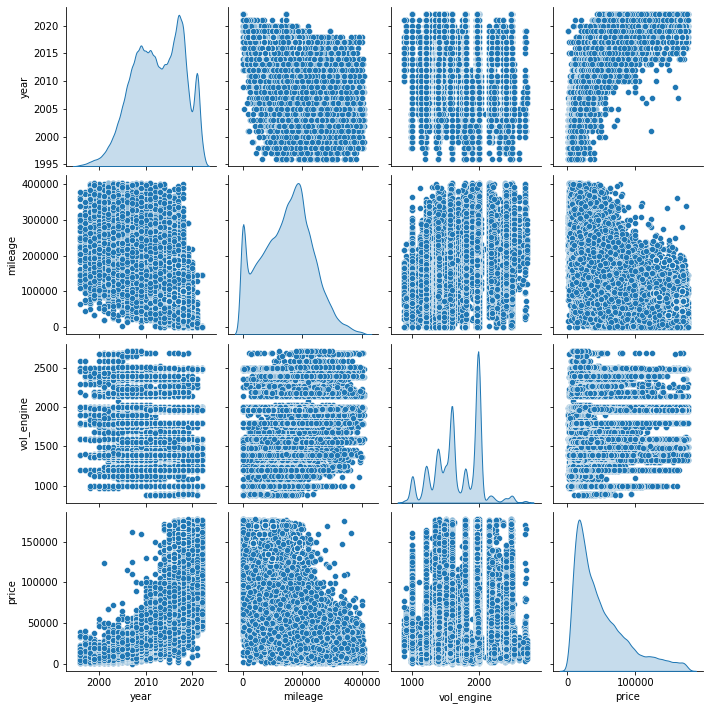

In [24]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

pada variabel year terdapat kenaikan sementara itu pada mileage terjadi penurunan, berbeda dengan variabel vol_engine memiliki pola random

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

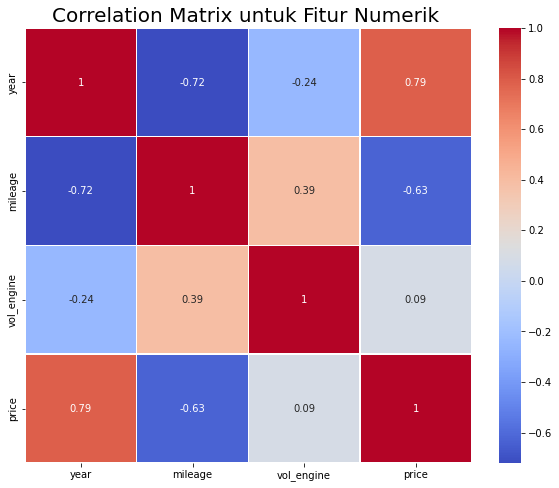

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

vol_engine memiliki pengaruh kecil terhadap price sehingga dapat dihilangkan

In [26]:
data.drop(['vol_engine'], inplace=True, axis=1)
data.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,mark,model,generation_name,year,mileage,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,CNG,Tarnowskie Góry,Śląskie,35900


# **Data Preparation**

## Encoding Fitur Kategori

teknik yang digunakan untuk encoding adalah one-hot-encoding. Penggunaan Library scikit-learn untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori antara lain, 'mark',	'model',	'generation_name',	'fuel',	'city',	'province' proses encoding ini menggunakanfitur get_dummmies


In [27]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['mark'], prefix='cut')],axis=1)
data = pd.concat([data, pd.get_dummies(data['model'], prefix='color')],axis=1)
data = pd.concat([data, pd.get_dummies(data['generation_name'], prefix='clarity')],axis=1)
data = pd.concat([data, pd.get_dummies(data['fuel'], prefix='clarity')],axis=1)
data = pd.concat([data, pd.get_dummies(data['city'], prefix='clarity')],axis=1)
data = pd.concat([data, pd.get_dummies(data['province'], prefix='clarity')],axis=1)
data.drop(['mark',	'model',	'generation_name',	'fuel',	'city',	'province'], axis=1, inplace=True)
data.head()


,year,mileage,price,cut_alfa-romeo,cut_audi,cut_bmw,cut_chevrolet,cut_citroen,cut_fiat,cut_ford,...,clarity_Podlaskie,clarity_Pomorskie,clarity_Trenczyn,clarity_Warmińsko-mazurskie,clarity_Wiedeń,clarity_Wielkopolskie,clarity_Zachodniopomorskie,clarity_Łódzkie,clarity_Śląskie,clarity_Świętokrzyskie
0,2015,139568,35900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,31991,78501,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015,278437,27000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,47600,30800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,103000,35900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Train-Test-Split**

Membagi dataset menjadi data latih (train) dan data uji (test) hal ini dilakukan sebelum membuat model. Porses ini dilakukan sebelum proses scaling (penyekalaan) bertujuan agar tidak terjadinya kebiciran data (data leakage). Maka proses scaling dilakukan terpisah antara data latih dan data uji.

Pada proyek ini memiliki proporsi pembagian data latih dan data uji sebanyak 90:10 hal ini dikarena dataset yang digunakan berjumlah banyak, dengan random_state = 42.


In [28]:
from sklearn.model_selection import train_test_split
 
X = data.drop(["price"],axis =1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

Untuk mengecek jumlah sampel pada masing-masing bagian, kita gunakan code berikut

In [29]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 100858
Total # of sample in train dataset: 90772
Total # of sample in test dataset: 10086


# **Standarisasi**

Proses standardisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Pada proyek ini menggunakan teknik StandarScaler dari library scikitlearn.

StandarScaler melakukan proses standardisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. Penerapan fitur dilakukan pada data latih saja dan untuk data uji akan di lakukan pada tahap evaluasi.


In [30]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year',	'mileage']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,mileage
99360,1.023803,-0.871452
39437,-0.488040,0.651149
59525,1.212783,-1.403305
11828,-0.677021,0.623312
52034,-0.110080,0.516335


proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:

In [31]:
X_train[numerical_features].describe().round(4)

,year,mileage
count,90772.0000,90772.0000
mean,0.0000,0.0000
std,1.0000,1.0000
min,-3.1338,-1.7421
25%,-0.6770,-0.7555
50%,0.0789,0.0730
75%,0.8348,0.6741
max,1.7797,3.0719


# **Model Development**

Pada proyek ini menggunakan algoritma machine learning KNN, Random Forest, dan Boosting

In [32]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

## Random Forest

random forest pada dasarnya adalah versi bagging dari algoritma decision tree. Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random. Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement.


mean_squared_error sebagai metrik untuk mengevaluasi performa model

In [33]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

* n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
* max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
* random_state: digunakan untuk mengontrol random number generator yang digunakan. 
* n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

## Boosting

algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa.
Dilihat dari caranya memperbaiki kesalahan pada model sebelumnya, algoritma boosting terdiri dari dua metode:
- Adaptive boosting
- Gradient boosting

Proyek ini menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost


In [34]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Berikut merupakan parameter-parameter yang digunakan pada potongan kode di atas.

* learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
* random_state: digunakan untuk mengontrol random number generator yang digunakan.

### KNN

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada modul ini, kita akan menggunakannya untuk kasus regresi.

Kelebihan KNN adalah algoritma yang mudah digunakan dan dipahami, namun memiliki kekurangan jika dihadapkan pada jumlah fitur atau dimensi yang besar.

Pada proyek ini nilai ketetanggaan terdekat(K) adalah 10 dan metode penghitungan jarang nya menggunakan default yaitu minkowski.


In [35]:
from sklearn.neighbors import KNeighborsRegressor

 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# Evaluasi

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.
tapi terlebih dahulu data uji discaling, hal ini dilakukan agar skala antara data latih dan data uji sama.

In [36]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Selanjutnya, mari kita evaluasi ketiga model kita dengan metrik MSE yang telah dijelaskan di atas.

In [37]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse
 

,train,test
KNN,121121.268974,147982.856818
RF,158215.71777,181317.6934
Boosting,478094.003422,471866.990688


Saat menghitung nilai Mean Squared Error pada data train dan test, kita membaginya dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar.

Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart

dapat dilihat model RF memilki error yanng paling sedikit berbeda dengan model boostong

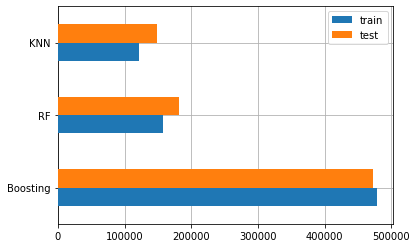

In [38]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test

In [39]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
17433,62900,76325.4,68808.1,43874.0


dapat dilihat prediksi yang paling mendekati adalah model RF